<a href="https://colab.research.google.com/github/RishabhVenkat/MCS-Patient-Healthy-Classifier/blob/main/MCS_Healthy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mne
from glob import glob
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mne.channels import make_standard_montage

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.6 MB/s eta 0:00:00


In [2]:
all_file_path = glob('Clustering_files/*.csv')

In [3]:
print(len(all_file_path))

2


In [4]:
all_file_path[0]

'Clustering_files/healthy.csv'

In [5]:
control_data = pd.read_csv('healthy.csv')
MCS_data = pd.read_csv('MCS_Clustering.csv')

In [6]:
# Extract channel names (assuming the first column contains time or index)
control_channel_names = control_data.columns[1:]
MCS_channel_names = MCS_data.columns[1:]

In [7]:
# Convert non-numeric values to NaN and then handle them
control_data[control_channel_names] = control_data[control_channel_names].apply(pd.to_numeric, errors='coerce')
# Convert non-numeric values to NaN and then handle them
MCS_data[MCS_channel_names] = MCS_data[MCS_channel_names].apply(pd.to_numeric, errors='coerce')

In [8]:
# Extract data values and transpose the matrix
control_data_values = control_data[control_channel_names].values.T
# Extract data values and transpose the matrix
MCS_data_values = MCS_data[MCS_channel_names].values.T

In [9]:
# Define the sampling frequency (e.g., 250 Hz)
sfreq = 250  # Adjust according to your data

In [10]:
# Create MNE info structure
control_info = mne.create_info(control_channel_names.tolist(), sfreq, ch_types='eeg')
# Create MNE info structure
MCS_info = mne.create_info(MCS_channel_names.tolist(), sfreq, ch_types='eeg')

In [11]:
# Create a RawArray object
control_raw = mne.io.RawArray(control_data_values, control_info)
# Create a RawArray object
MCS_raw = mne.io.RawArray(MCS_data_values, MCS_info)

Creating RawArray with float64 data, n_channels=27, n_times=13144
    Range : 0 ... 13143 =      0.000 ...    52.572 secs
Ready.
Creating RawArray with float64 data, n_channels=15, n_times=100
    Range : 0 ... 99 =      0.000 ...     0.396 secs
Ready.


Using matplotlib as 2D backend.


/usr/local/lib/python3.10/dist-packages/mne/viz/_figure.py:372: RuntimeWarning: Mean of empty slice
  data -= np.nanmean(data, axis=1, keepdims=True)


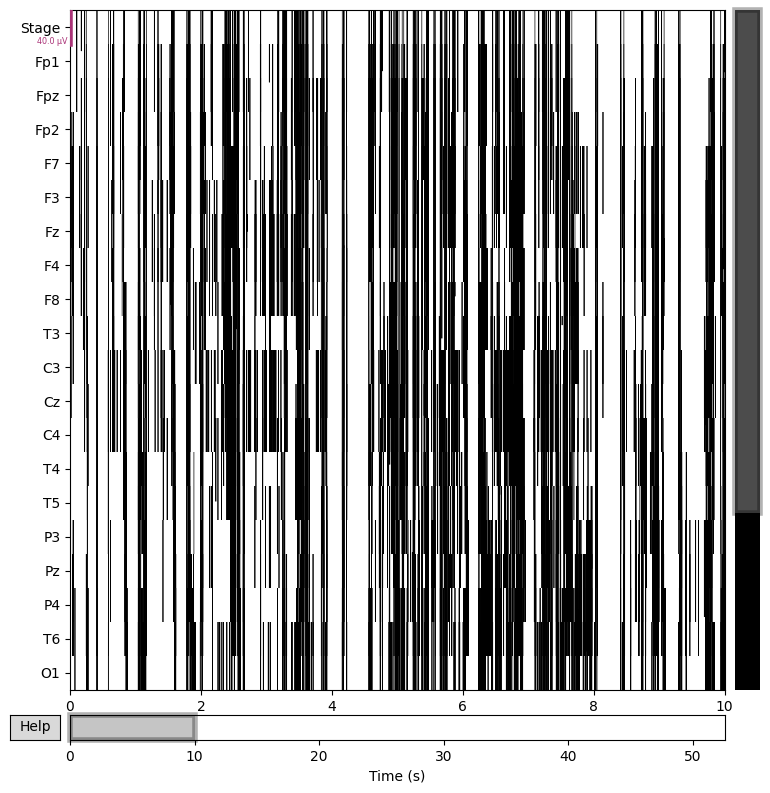

/usr/local/lib/python3.10/dist-packages/mne/viz/_figure.py:372: RuntimeWarning: Mean of empty slice
  data -= np.nanmean(data, axis=1, keepdims=True)


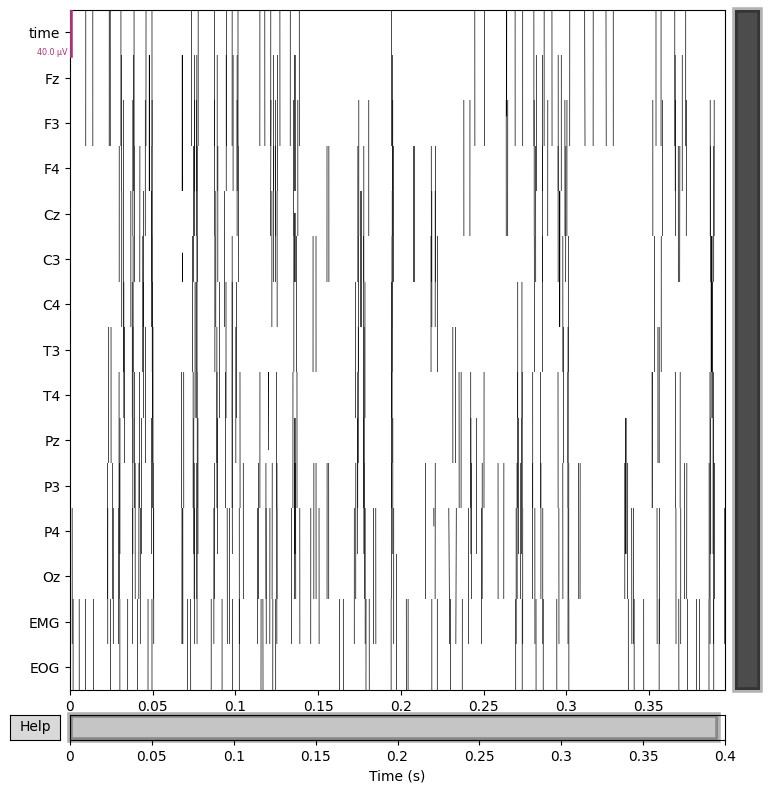

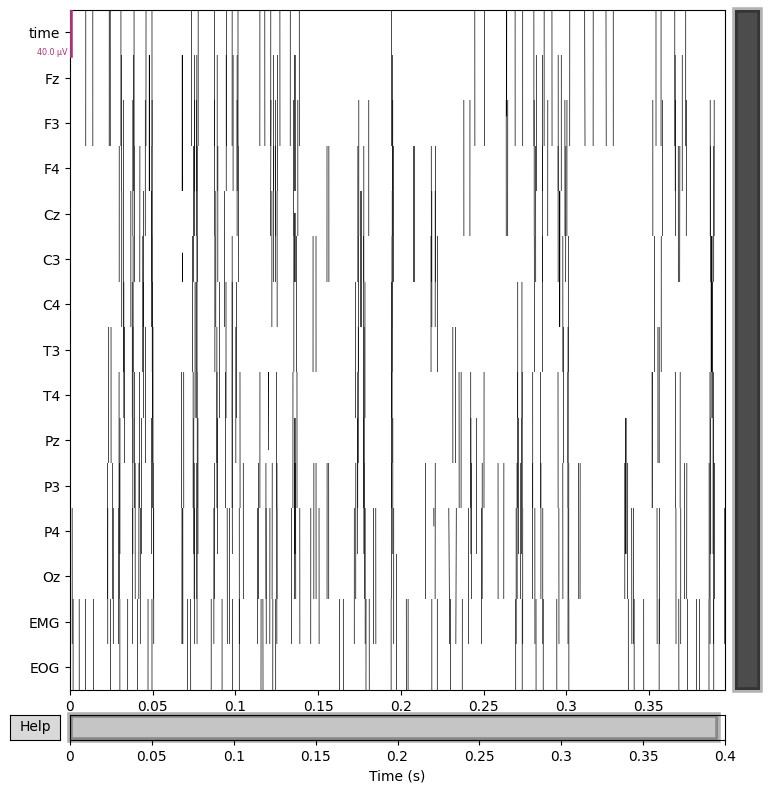

In [12]:
# Plot the raw data
control_raw.plot()
# Plot the raw data
MCS_raw.plot()

In [13]:
def read_data(file_path):
    # Load the CSV data into a pandas DataFrame
    df1 = pd.read_csv("healthy.csv")
    df2 = pd.read_csv("MCS_Clustering.csv")

    # Assume the first column is time and the rest are EEG channels
    time1 = df1.iloc[:, 0].values
    eeg_data1 = df1.iloc[:, 1:].values.T  # Transpose to shape (n_channels, n_samples)

    time2 = df2.iloc[:, 0].values
    eeg_data2 = df2.iloc[:, 1:].values.T

    # Create an MNE Info object
    sfreq = 1000  # Sample frequency in Hz (adjust based on your data)
    ch_names1 = df1.columns[1:].tolist()
    ch_names2 = df2.columns[1:].tolist()
    info1 = mne.create_info(ch_names=ch_names1, sfreq=sfreq, ch_types='eeg')
    info2 = mne.create_info(ch_names=ch_names2, sfreq=sfreq, ch_types='eeg')

    # Create a RawArray object
    control_raw = mne.io.RawArray(control_data_values, info1)
    MCS_raw = mne.io.RawArray(MCS_data_values, info2)

    # Filter the data
    control_raw.filter(l_freq=0.5, h_freq=45)
    MCS_raw.filter(l_freq=0.5, h_freq=45)

    # Re-reference to common average
    control_raw.set_eeg_reference('average', projection=True)
    MCS_raw.set_eeg_reference('average', projection=True)

    # Check the length of the data in seconds
    data_duration = len(control_raw.times) / sfreq
    print(f"Data duration: {data_duration} seconds")

    data_duration = len(MCS_raw.times) / sfreq
    print(f"Data duration: {data_duration} seconds")

    # Set the duration and overlap for epochs
    epoch_duration = 5  # in seconds
    overlap = 0.5  # ensure overlap is less than duration

    # Adjust the epoch duration if the data is too short
    if data_duration < epoch_duration:
        epoch_duration = data_duration / 2  # Adjust to half of the data duration if too short
        overlap = epoch_duration / 2 - 0.01  # Ensure overlap is valid
        print(f"Adjusting epoch duration to {epoch_duration} seconds and overlap to {overlap} seconds due to short data length")

    # Create epochs with fixed length
    epochs_control = mne.make_fixed_length_epochs(control_raw, duration=epoch_duration, overlap=overlap)
    epochs_MCS = mne.make_fixed_length_epochs(MCS_raw, duration=epoch_duration, overlap=overlap)
    # Convert epochs to NumPy array
    epochs_array1 = epochs_control.get_data()
    epochs_array2 = epochs_MCS.get_data()

    return epochs_array1
    return epochs_array2

# Define the file path
control_file_path = '/content/Clustering_files/healthy.csv'
MCS_file_path = '/content/Clustering_files/MCS_Clustering.csv'

# Read the data using the correct function name
sample_data1 = read_data(control_file_path)
sample_data2 = read_data(MCS_file_path)

# Print the shape of the resulting array to verify
print(sample_data1.shape)
print(sample_data2.shape)

Creating RawArray with float64 data, n_channels=27, n_times=13144
    Range : 0 ... 13143 =      0.000 ...    13.143 secs
Ready.
Creating RawArray with float64 data, n_channels=15, n_times=100
    Range : 0 ... 99 =      0.000 ...     0.099 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 6601 samples (6.601 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandp

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
<ipython-input-13-794cba97f309>:26: RuntimeWarning: filter_length (6601) is longer than the signal (100), distortion is likely. Reduce filter length or filter a longer signal.
  MCS_raw.filter(l_freq=0.5, h_freq=45)


Data duration: 13.144 seconds
Data duration: 0.1 seconds
Adjusting epoch duration to 0.05 seconds and overlap to 0.015000000000000001 seconds due to short data length
Not setting metadata
375 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Not setting metadata
2 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 375 events and 50 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 2 events and 50 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=27, n_times=13144
    Range : 0 ... 13143 =      0.000 ...    13.143 secs
Ready.
Creating RawArray with float64 data, n_channels=15, n_times=100
    Range : 0 ... 99 =      0.000 ...     0.099 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
<ipython-input-13-794cba97f309>:26: RuntimeWarning: filter_length (6601) is longer than the signal (100), distortion is likely. Reduce filter length or filter a longer signal.
  MCS_raw.filter(l_freq=0.5, h_freq=45)


0 bad epochs dropped
Using data from preloaded Raw for 2 events and 50 original time points ...
0 bad epochs dropped
(375, 27, 50)
(375, 27, 50)


In [14]:
sample_data1.shape #no of epochs, channels, length of signal

(375, 27, 50)

In [15]:
sample_data2.shape

(375, 27, 50)

In [16]:
%%capture
control_epochs_array = [read_data(i) for i in control_file_path]
MCS_epochs_array = [read_data(i) for i in MCS_file_path]

In [17]:
control_epochs_array[0].shape, MCS_epochs_array[1].shape

((375, 27, 50), (375, 27, 50))

In [18]:
control_epoch_labels = [[len(i) * [0]] for i in control_epochs_array]
MCS_epoch_labels = [[len(i) * [1]] for i in MCS_epochs_array]
len(control_epoch_labels), len(MCS_epoch_labels)

(37, 44)

In [19]:
data_list = control_epochs_array + MCS_epochs_array
label_list = control_epoch_labels + MCS_epoch_labels

In [20]:
group_list = [[i] * len(j) for i, j in enumerate(data_list)]
len(group_list)

81

In [21]:
# Stack arrays in sequence vertically (row-wise)
try:
    data_array = np.vstack(data_list)
except ValueError as e:
    print(f"Error stacking arrays: {e}")
#label_array = np.hstack(label_list)
#group_array = np.hstack(group_list)
#print(data_array.shape, label_array.shape, group_array.shape)

label_array = np.array(label_list).reshape(-1)
group_array = np.array(group_list).reshape(-1)

In [22]:
np.mean(data_array, axis = -1).shape

(30375, 27)

In [23]:
from scipy import stats
def mean(x):
  return np.mean(x, axis = -1)
def std(x):
  return np.std(x, axis = -1)
def ptp(x):
  return np.ptp(x, axis = -1)
def var(x):
  return np.var(x, axis = -1)
def minim(x):
  return np.min(x, axis = -1)
def maxim(x):
  return np.max(x, axis = -1)
def argminim(x):
  return np.argmin(x, axis = -1)
def argmaxim(x):
  return np.argmax(x, axis = -1)
def rms(x):
  return np.sqrt(np.mean(x ** 2, axis = -1))
def abs_diff_signal(x):
  return np.sum(np.abs(np.diff(x, axis = -1)), axis = -1)
def skewness(x):
  return stats.skew(x, axis = -1)
def kurtosis(x):
  return stats.kurtosis(x, axis = -1)
def entropy(x):
    # Ensure x is non-negative and normalized
    x = np.abs(x)  # Convert all values to positive
    x = x / np.sum(x, axis=-1, keepdims=True)  # Normalize
    return stats.entropy(x, axis=-1)
def concatenate_features(x):
  return np.concatenate((mean(x), std(x), ptp(x), var(x), minim(x), maxim(x), argminim(x),
                         argmaxim(x), rms(x), abs_diff_signal(x), skewness(x), kurtosis(x), entropy(x)), axis = -1)


In [24]:
features = []
for d in data_array:
  features.append(concatenate_features(d))

In [25]:
features_array = np.array(features)
features_array.shape

(30375, 351)

In [26]:
# Ensure all arrays have the same number of samples
assert features_array.shape[0] == label_array.shape[0] == group_array.shape[0], "Inconsistent number of samples in input arrays"

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.impute import SimpleImputer

In [28]:
# Define the model and pipeline
clf = LogisticRegression()
gkf = GroupKFold(5)

In [29]:
# Use SimpleImputer to handle missing values
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # You can change the strategy to 'median' or 'constant'
    ('scaler', StandardScaler()),
    ('clf', clf)
])

In [30]:
param_grid = {'clf__C': [0.1, 0.5, 0.7, 1, 3, 5, 7]}

In [31]:
# Perform GridSearchCV
gscv = GridSearchCV(pipe, param_grid, cv=gkf, n_jobs=12)
gscv.fit(features_array, label_array, groups=group_array)

GridSearchCV(cv=GroupKFold(n_splits=5),
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('clf', LogisticRegression())]),
             n_jobs=12, param_grid={'clf__C': [0.1, 0.5, 0.7, 1, 3, 5, 7]})

In [32]:
# Print the best parameters
print(f"Best parameters found: {gscv.best_params_}")

Best parameters found: {'clf__C': 0.1}


In [33]:
gscv.best_score_

0.5433823529411764